In [39]:
import sys
import os
sys.path.append('/home/kvirk/devel')
sys.path = list(set(sys.path))
from matplotlib import pyplot as plt
from scipy import signal
import numpy as np
from resdk.mathutils import *
%matplotlib inline

import numpy as np

In [40]:
def fourier_amplitudes(nbits, phi):
    N = 2**nbits
    m = np.arange(N)
    k = np.arange(N)
    m,k = np.meshgrid(m,k)
    phase = 2*np.pi*m*(k-2**nbits*phi)/N
    fk = np.sum(np.exp(1j*phase),axis=1)/np.sqrt(N)
    return fk
#

<StemContainer object of 3 artists>

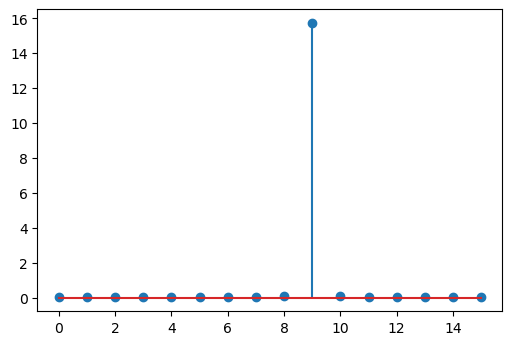

In [41]:
f = fourier_amplitudes(4,0.558)
F = np.abs(f)**2
fig,ax = plt.subplots(dpi=100)
ax.stem(F)

In [42]:
SuperPosition = lambda k, a, N : np.abs((1-np.exp(1j*2*np.pi*np.ceil(N/a)*k*a/N))/ (1-np.exp(1j*2*np.pi*k*a/N) +1e-16 ) )**2

In [57]:
def period_finding_expt(nmeas, n = 10,a = 7, odd=0, cutoff=0.1):
    N = 2**n+odd
    M = 2**(n//2)
    assert a < M
    k = np.arange(N)
    P = SuperPosition(k, a, N)
    if not np.isinf(nmeas):
        k = np.random.choice(k, size=nmeas,p=P/sum(P))
        bins,counts = np.unique(k,return_counts=True)
        isort = np.argsort(-counts)
        k0 = bins[isort]
        H = counts[isort]
        sel = H>H.max() * cutoff
        H = H[sel]
        k0 = k0[sel]
    else:
        k0,H = signal.find_peaks(P,P.max()/10)
        H = H['peak_heights']
        counts,bins = 0,0
    # H = H/sum(H)
    cf = [to_continued_fractions(p/N) for p in k0]
    guess = [c for c in cf if len(c)==3]
    if len(guess):
        guess = guess[0][1]
    return guess, cf,(k,k0,H, counts, bins), (a,n)


In [59]:
norm1 = lambda x : x / sum(x)
supnorm = lambda x : x / x.max()
per  = 12
nbits = 10
odd = 0
N = 2**nbits + odd
guess0,cf0,(_k,k00,H0,_,_),(a,n) = period_finding_expt(np.inf,n=nbits,a=per,odd=odd)
guess, cf,(k,k0,H,counts,bins),(a,n) = period_finding_expt(100,n=nbits,a=per,odd=odd)
print('Period = {}, N = {}'.format(per, N))
for data in (sorted(list(zip(k0, cf)),key=lambda x : x[0])):
    print(data)

Period = 12, N = 1024
(85, [0, 12, 21, 3, 1])
(171, [0, 5, 1, 84, 2])
(256, [0, 4])
(341, [0, 3, 341])
(512, [0, 2])
(597, [0, 1, 1, 2, 1, 1, 20, 1, 3])
(768, [0, 1, 3])
(853, [0, 1, 4, 1, 84, 1, 1])
(939, [0, 1, 11, 21, 3, 1])


In [60]:
for _t,c in (sorted(list(zip(k0, cf)),key=lambda x : x[0])):
    p,q = from_continued_fractions(c,return_series=True)
    show =list(zip(p.astype(int),q.astype(int)))
    show =', '.join(['{:d}/{:d}'.format(a,b) for a,b in show[1:]])
    print('{',show,'}')

{ 1/12, 21/253, 64/771, 85/1024 }
{ 1/5, 1/6, 85/509, 171/1024 }
{ 1/4 }
{ 1/3, 341/1024 }
{ 1/2 }
{ 1/1, 1/2, 3/5, 4/7, 7/12, 144/247, 151/259, 597/1024 }
{ 1/1, 3/4 }
{ 1/1, 4/5, 5/6, 424/509, 429/515, 853/1024 }
{ 1/1, 11/12, 232/253, 707/771, 939/1024 }


In [61]:
for _t,c in (sorted(list(zip(k0, cf)),key=lambda x : x[0])):
    p,q = from_continued_fractions(c,return_series=True)
    show = ['{:.2f}'.format(np.abs(_t - a/b*N)) for a,b in zip(p,q)][1:]
    show = ', '.join(show)
    print('{',show,'}')


{ 0.33, 0.00, 0.00, 0.00 }
{ 33.80, 0.33, 0.00, 0.00 }
{ 0.00 }
{ 0.33, 0.00 }
{ 0.00 }
{ 427.00, 85.00, 17.40, 11.86, 0.33, 0.01, 0.00, 0.00 }
{ 256.00, 0.00 }
{ 171.00, 33.80, 0.33, 0.00, 0.00, 0.00 }
{ 85.00, 0.33, 0.00, 0.00, 0.00 }


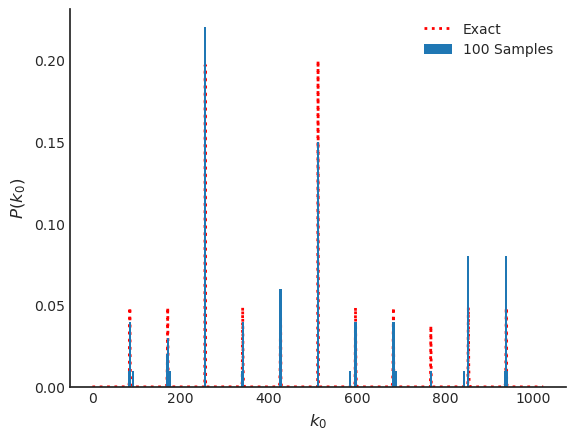

In [46]:
# with plt.style.context('seaborn-white'):
#     with plt.style.context('style1.rc'):
#         fig,ax=plt.subplots(dpi=100, figsize=(6.4,5))
#         ax.plot(_k, norm1(SuperPosition(_k, a, N)),linewidth=1,label=a)
#         ax.plot(_k, norm1(SuperPosition(_k, 5, N)),linewidth=1,label=5)
#         ax.set_xlabel('$k_0$')
#         ax.set_ylabel('$P(k_0)$')
#         ax.grid(True)
#         ax.legend(title='Period')

with plt.style.context('seaborn-white'):
    with plt.style.context('style1.rc'):
        fig,ax=plt.subplots(dpi=100, figsize=(6.4,5))
        ax.plot(_k, norm1(SuperPosition(_k, a, N)),':',linewidth=2,label='Exact',color='red',zorder=1)
        ax.bar(bins, counts/sum(counts), 5, label='100 Samples',zorder=2)
        ax.set_xlabel('$k_0$')
        ax.set_ylabel('$P(k_0)$')
        ax.grid(False)
        ax.legend()

In [9]:
p,q = from_continued_fractions(cf0[0], return_series=True)
k00[0]

79

In [10]:
[np.abs(N*p[i]/q[i] - k00[0]) for i in range(len(p))]

[79.0, 6.333333333333329, 0.2307692307692264, 0.002967359050444429, 0.0]

In [65]:
A = 40*12 * 12*12

In [67]:
A / 40 * 40e-3

69.12

In [69]:
40*12*0.922/2.2

201.16363636363636